# Binary Classification with Neural Networks in TensorFlow

In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf

tf.random.set_seed(42)
print(tf.__version__)

2.5.0


In [3]:
# import and explore toy-dataset
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, noise=0.03, random_state=42)
print(X[:10])
print(y[:10])
(len(X), len(y))

[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]
 [-0.47964637  0.67643477]
 [-0.01364836  0.80334872]
 [ 0.77151327  0.14775959]
 [-0.16932234 -0.79345575]
 [-0.1214858   1.02150905]]
[1 1 1 1 0 1 1 1 1 0]


(1000, 1000)

In [4]:
import matplotlib.pyplot as plt

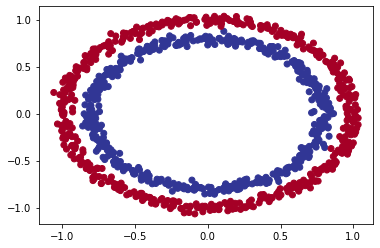

In [5]:
# Visualize with a plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [6]:
# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

In [7]:
# Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
                metrics=['accuracy'])

# Fit the model
epochs=100
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
history_fit = model.fit(X_train, y_train, epochs=epochs, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 4ms/step - loss: 0.6945 - accuracy: 0.4988
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.4975
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6930 - accuracy: 0.4963
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6922 - accuracy: 0.4975
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6914 - accuracy: 0.5063
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6906 - accuracy: 0.5013
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6898 - accuracy: 0.4950
Epoch 8/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6889 - accuracy: 0.5038
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5013
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.5050
Epoch 11/

In [8]:
loss, accuracy = model.evaluate(X_test, y_test)
(loss, accuracy)

7/7 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.4950


(0.6933720111846924, 0.4950000047683716)

### Our model is very bad, just let's keep exploring

In [9]:
import numpy as np

In [10]:
def plot_decision_boundary(model, X, y):
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classification...
doing binary classification...


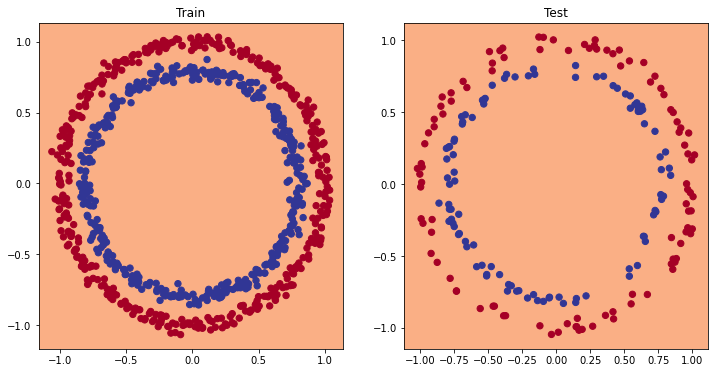

In [11]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, X=X_test, y=y_test)
plt.show()

### It's always giving the same answer, this is why accuracy=50%

In [12]:
import pandas as pd

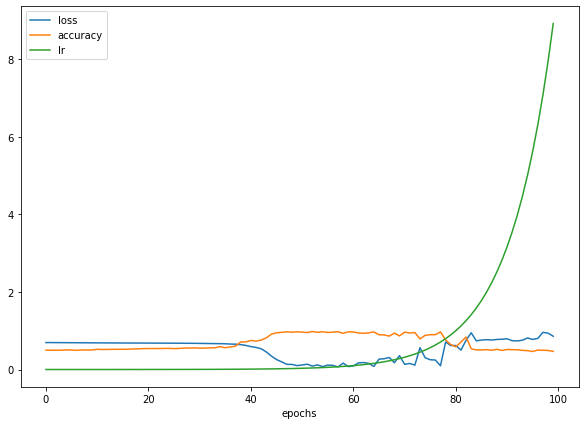

In [13]:
# Checkout the history
pd.DataFrame(history_fit.history).plot(figsize=(10,7), xlabel="epochs");

### let's try to find a good learning rate: it will be on one of the first local minimum of the next chart

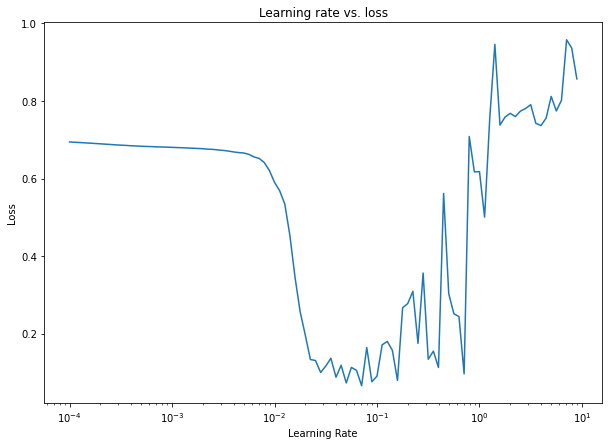

In [14]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(epochs)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_fit.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

### is probably between 0.01 and 0.1, let's try with 0.02

In [15]:
# Create the model
model2 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model2.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.02), 
                metrics=['accuracy'])

epochs2=20
history_fit2 = model2.fit(X_train, y_train, epochs=epochs2)


loss, accuracy = model2.evaluate(X_test, y_test)
(loss, accuracy)

Epoch 1/20
25/25 [==============================] - 1s 8ms/step - loss: 0.6918 - accuracy: 0.5575
Epoch 2/20
25/25 [==============================] - 0s 8ms/step - loss: 0.6803 - accuracy: 0.5688
Epoch 3/20
25/25 [==============================] - 0s 6ms/step - loss: 0.6584 - accuracy: 0.6150
Epoch 4/20
25/25 [==============================] - 0s 5ms/step - loss: 0.6050 - accuracy: 0.7125
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5376 - accuracy: 0.7775
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4606 - accuracy: 0.8225
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4149 - accuracy: 0.8275
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3545 - accuracy: 0.8938
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3146 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.2621 - accuracy: 0.9375
Epoch 11/20
25/25 [

(0.16122697293758392, 0.9300000071525574)

### it worked! let's keep exploring!

doing binary classification...
doing binary classification...


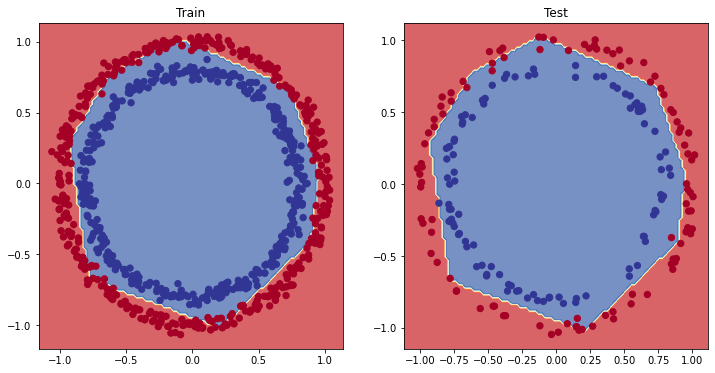

In [17]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model2, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model2, X=X_test, y=y_test)
plt.show()

In [18]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model2.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[87, 14],
       [ 0, 99]])

### let's give some graphic to our confusion matrix

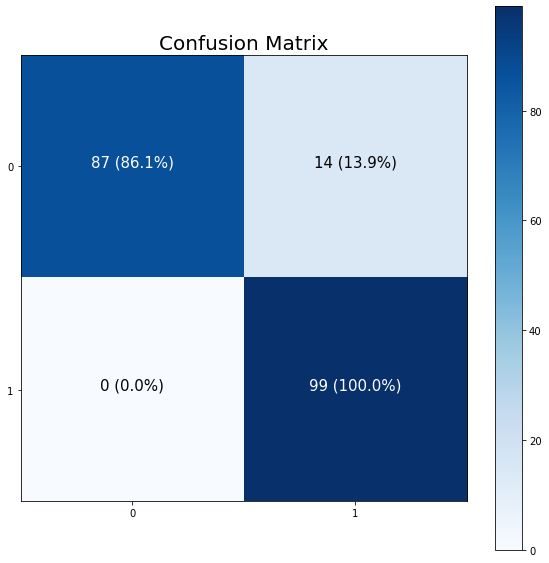

In [19]:
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)